In [43]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import hvplot.pandas  
from glob import glob
from urllib import request
import missingno as msno

from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [82]:
import warnings
warnings.filterwarnings('ignore')

## 파일 로드

In [147]:
train_csv=pd.read_csv('./input/data/train/train.csv')
eval_csv=pd.read_csv('./input/data/eval/info.csv')

In [45]:
train_jpg_directory='./input/data/train/images'
eval_jpg_directory='./input/data/eval/images'

## 데이터 파악

In [46]:
train_csv.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [47]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


In [48]:
eval_csv.head()

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,0
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,0
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,0
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,0
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,0


In [49]:
eval_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageID  12600 non-null  object
 1   ans      12600 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 197.0+ KB


In [95]:
train_csv.isnull().sum()

id        0
gender    0
race      0
age       0
path      0
dtype: int64

In [189]:
def getImagePaths(path):
    image_names = []
    for root, dirs, files in os.walk(path):
        for folder in dirs:
            if folder.startswith('00'):
                for i in os.listdir(os.path.join(root, folder)):
                    if i.startswith('._'):
                        image_root=os.path.join(root,folder, i)
                        image_names.append(image_root)
    return image_names

In [71]:
def display_multiple_img(images_paths, rows, cols):

    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    for ind,image_path in enumerate(images_paths):
        image=cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()

In [190]:
train_images_path = getImagePaths(train_jpg_directory)
eval_images_path = getImagePaths(eval_jpg_directory)

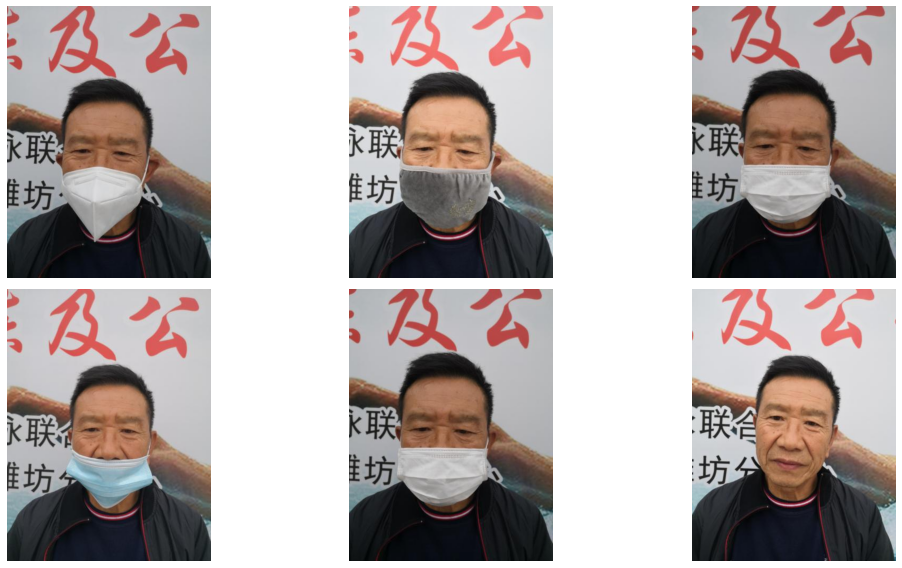

In [72]:
display_multiple_img(train_images_path[0:6], 2, 3)

## EDA

In [73]:
train_csv.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


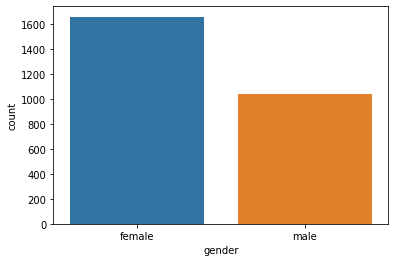

In [80]:
sns.countplot(x="gender", data=train_csv)

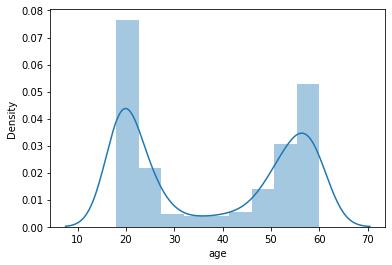

In [83]:
sns.distplot(train_csv['age'], kde=True)

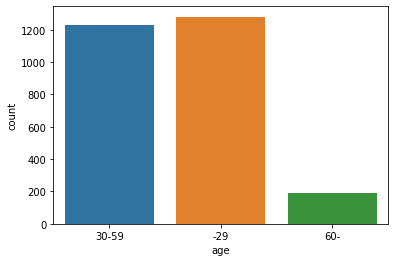

In [92]:
train_csv['age']=train_csv.apply(lambda x: "-29" if x['age']<30 else "30-59"
                                 if x['age']>=30 and x['age']<60 else "60-" 
                                 if x['age']>=60 else "0" , axis=1)
sns.countplot(x="age", data=train_csv)

In [368]:
train_image=pd.DataFrame(train_images_path)
train_image

,0
0,./input/data/train/images/006179_female_Asian_...
1,./input/data/train/images/006179_female_Asian_...
2,./input/data/train/images/006179_female_Asian_...
3,./input/data/train/images/006179_female_Asian_...
4,./input/data/train/images/006179_female_Asian_...
...,...
18895,./input/data/train/images/001240_female_Asian_...
18896,./input/data/train/images/001240_female_Asian_...
18897,./input/data/train/images/001240_female_Asian_...
18898,./input/data/train/images/001240_female_Asian_...


In [369]:
train_image['mask']=train_image[0].str.split('_').str[4].str[:4] #train_image.iloc[3,0].split('_')[4][:4] 마스크착용 (mask, inco, norm)
train_image

,0,mask
0,./input/data/train/images/006179_female_Asian_...,inco
1,./input/data/train/images/006179_female_Asian_...,mask
2,./input/data/train/images/006179_female_Asian_...,mask
3,./input/data/train/images/006179_female_Asian_...,norm
4,./input/data/train/images/006179_female_Asian_...,mask
...,...,...
18895,./input/data/train/images/001240_female_Asian_...,mask
18896,./input/data/train/images/001240_female_Asian_...,mask
18897,./input/data/train/images/001240_female_Asian_...,mask
18898,./input/data/train/images/001240_female_Asian_...,mask


In [370]:
train_image['age']=train_image[0].str.split('_').str[3].str[:2]  #train_image.iloc[0,0].split('_')[3][:2] 나이 (float)
train_image=train_image.astype({'age':'int'})
train_image

,0,mask,age
0,./input/data/train/images/006179_female_Asian_...,inco,18
1,./input/data/train/images/006179_female_Asian_...,mask,18
2,./input/data/train/images/006179_female_Asian_...,mask,18
3,./input/data/train/images/006179_female_Asian_...,norm,18
4,./input/data/train/images/006179_female_Asian_...,mask,18
...,...,...,...
18895,./input/data/train/images/001240_female_Asian_...,mask,24
18896,./input/data/train/images/001240_female_Asian_...,mask,24
18897,./input/data/train/images/001240_female_Asian_...,mask,24
18898,./input/data/train/images/001240_female_Asian_...,mask,24


In [371]:
train_image_age=train_image.copy()
train_image_age

,0,mask,age
0,./input/data/train/images/006179_female_Asian_...,inco,18
1,./input/data/train/images/006179_female_Asian_...,mask,18
2,./input/data/train/images/006179_female_Asian_...,mask,18
3,./input/data/train/images/006179_female_Asian_...,norm,18
4,./input/data/train/images/006179_female_Asian_...,mask,18
...,...,...,...
18895,./input/data/train/images/001240_female_Asian_...,mask,24
18896,./input/data/train/images/001240_female_Asian_...,mask,24
18897,./input/data/train/images/001240_female_Asian_...,mask,24
18898,./input/data/train/images/001240_female_Asian_...,mask,24


In [373]:
def age_range(x):
    if x<30:
        return "-29"
    elif (x>=30 and x<60):
        return "30-59"
    elif x>=60:
        return "60-"

train_image['age']=train_image['age'].apply(age_range)
train_image

,0,mask,age
0,./input/data/train/images/006179_female_Asian_...,inco,-29
1,./input/data/train/images/006179_female_Asian_...,mask,-29
2,./input/data/train/images/006179_female_Asian_...,mask,-29
3,./input/data/train/images/006179_female_Asian_...,norm,-29
4,./input/data/train/images/006179_female_Asian_...,mask,-29
...,...,...,...
18895,./input/data/train/images/001240_female_Asian_...,mask,-29
18896,./input/data/train/images/001240_female_Asian_...,mask,-29
18897,./input/data/train/images/001240_female_Asian_...,mask,-29
18898,./input/data/train/images/001240_female_Asian_...,mask,-29


In [374]:
train_image['gender']=train_image[0].str.split('_').str[1] #train_image.iloc[0,0].split('_')[1] 성별
train_image

,0,mask,age,gender
0,./input/data/train/images/006179_female_Asian_...,inco,-29,female
1,./input/data/train/images/006179_female_Asian_...,mask,-29,female
2,./input/data/train/images/006179_female_Asian_...,mask,-29,female
3,./input/data/train/images/006179_female_Asian_...,norm,-29,female
4,./input/data/train/images/006179_female_Asian_...,mask,-29,female
...,...,...,...,...
18895,./input/data/train/images/001240_female_Asian_...,mask,-29,female
18896,./input/data/train/images/001240_female_Asian_...,mask,-29,female
18897,./input/data/train/images/001240_female_Asian_...,mask,-29,female
18898,./input/data/train/images/001240_female_Asian_...,mask,-29,female


In [375]:
train_image.set_index(['mask', 'age', 'gender'], inplace=True)

In [376]:
train_image['multi']=train_image.index.map('_'.join)
train_image

0  \
mask age gender                                                      
inco -29 female  ./input/data/train/images/006179_female_Asian_...   
mask -29 female  ./input/data/train/images/006179_female_Asian_...   
         female  ./input/data/train/images/006179_female_Asian_...   
norm -29 female  ./input/data/train/images/006179_female_Asian_...   
mask -29 female  ./input/data/train/images/006179_female_Asian_...   
...                                                            ...   
         female  ./input/data/train/images/001240_female_Asian_...   
         female  ./input/data/train/images/001240_female_Asian_...   
         female  ./input/data/train/images/001240_female_Asian_...   
         female  ./input/data/train/images/001240_female_Asian_...   
inco -29 female  ./input/data/train/images/001240_female_Asian_...   

                           multi  
mask age gender                   
inco -29 female  inco_-29_female  
mask -29 female  mask_-29_female  
         female  mask_-29_female  
norm -29 female  norm_-29_female  
mask -29 female  mask_-29_female  
...                          ...  
         female  mask_-29_female  
         female  mask_-29_female  
         female  mask_-29_female  
         female  mask_-29_female  
inco -29 female  inco_-29_female  

[18900 rows x 2 columns]

In [377]:
def labels(x):
    if x=='mask_-29_male':
        return 0
    elif x=='mask_30-59_male':
        return 1
    elif x=='mask_60-_male':
        return 2
    elif x=='mask_-29_female':
        return 3
    elif x=='mask_30-59_female':
        return 4
    elif x=='mask_60-_female':
        return 5
    elif x=='inco_-29_male':
        return 6
    elif x=='inco_30-59_male':
        return 7
    elif x=='inco_60-_male':
        return 8
    elif x=='inco_-29_female':
        return 9
    elif x=='inco_30-59_female':
        return 10
    elif x=='inco_60-_female':
        return 11
    elif x=='norm_-29_male':
        return 12
    elif x=='norm_30-59_male':
        return 13
    elif x=='norm_60-_male':
        return 14
    elif x=='norm_-29_female':
        return 15
    elif x=='norm_30-59_female':
        return 16
    elif x=='norm_60-_female':
        return 17
    
train_image['multi']=train_image['multi'].apply(labels)
train_image

0  multi
mask age gender                                                          
inco -29 female  ./input/data/train/images/006179_female_Asian_...      9
mask -29 female  ./input/data/train/images/006179_female_Asian_...      3
         female  ./input/data/train/images/006179_female_Asian_...      3
norm -29 female  ./input/data/train/images/006179_female_Asian_...     15
mask -29 female  ./input/data/train/images/006179_female_Asian_...      3
...                                                            ...    ...
         female  ./input/data/train/images/001240_female_Asian_...      3
         female  ./input/data/train/images/001240_female_Asian_...      3
         female  ./input/data/train/images/001240_female_Asian_...      3
         female  ./input/data/train/images/001240_female_Asian_...      3
inco -29 female  ./input/data/train/images/001240_female_Asian_...      9

[18900 rows x 2 columns]

In [378]:
simple_train_image=train_image.reset_index()
simple_train_image

,mask,age,gender,0,multi
0,inco,-29,female,./input/data/train/images/006179_female_Asian_...,9
1,mask,-29,female,./input/data/train/images/006179_female_Asian_...,3
2,mask,-29,female,./input/data/train/images/006179_female_Asian_...,3
3,norm,-29,female,./input/data/train/images/006179_female_Asian_...,15
4,mask,-29,female,./input/data/train/images/006179_female_Asian_...,3
...,...,...,...,...,...
18895,mask,-29,female,./input/data/train/images/001240_female_Asian_...,3
18896,mask,-29,female,./input/data/train/images/001240_female_Asian_...,3
18897,mask,-29,female,./input/data/train/images/001240_female_Asian_...,3
18898,mask,-29,female,./input/data/train/images/001240_female_Asian_...,3


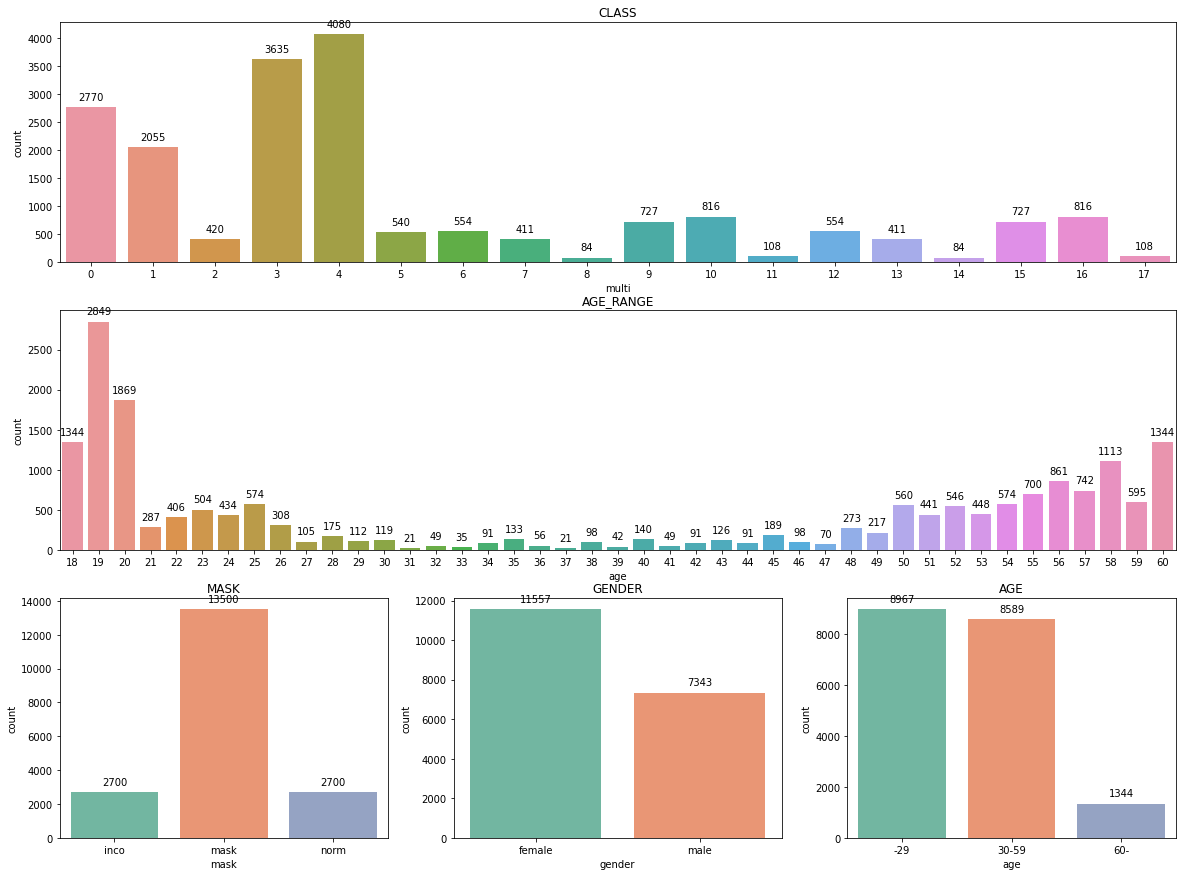

In [401]:
fig = plt.figure(figsize=(20,15))
ax1 = plt.subplot2grid((3,3),(0,0),colspan=3)
ax5 = plt.subplot2grid((3,3),(1,0),colspan=3)
ax2 = plt.subplot2grid((3,3),(2,0))
ax3 = plt.subplot2grid((3,3),(2,1))
ax4 = plt.subplot2grid((3,3),(2,2))


ax1=sns.countplot(x='multi', data=train_image, ax=ax1)
ax1.set_title('CLASS')
for p in ax1.patches:
    ax1.annotate('{:d}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax2=sns.countplot(x='mask', data=simple_train_image, ax=ax2, palette='Set2')
ax2.set_title('MASK')
for p in ax2.patches:
    ax2.annotate('{:d}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
ax3=sns.countplot(x="gender", data=simple_train_image, ax=ax3, palette='Set2')
ax3.set_title('GENDER')
for p in ax3.patches:
    ax3.annotate('{:d}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
ax4=sns.countplot(x="age", data=simple_train_image, ax=ax4, palette='Set2')
ax4.set_title('AGE')
for p in ax4.patches:
    ax4.annotate('{:d}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax5=sns.countplot(x="age", data=train_image_age, ax=ax5)
ax5.set_title('AGE_RANGE')
for p in ax5.patches:
    ax5.annotate('{:d}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()
fig.savefig('datacount.png')